In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$         INITIAL SETTINGS - НАЧАЛЬНЫЕ УСТАНОВКИ          $$$$$$$$$$$$$$$$$$$$$$$$$$$$
# VISUAL --- YANDEX

In [1]:
# Pandas
import pandas as pd
import numpy as np

In [2]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Date & Time
from datetime import datetime

In [4]:
# Установка, чтобы показывались все имеющиеся столбцы
pd.options.display.max_columns = None

In [ ]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTIONS          $$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [5]:
# Сохраняем в переменную путь для скачивания файла
file_search = 'C:/Users/Андрей/Downloads/searchquery_ayaweb7.csv'

In [6]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH DOWNLOADS         $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def search_downloads(file_path):
    look_up = {'01': 'Январь', '02': 'Февраль', '03': 'Март', '04': 'Апрель', '05': 'Май', '06': 'Июнь',
           '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь', '12': 'Декабрь'}
    df = pd.read_csv(file_path, skiprows=4, sep=';')
    df = df \
    .iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] \
    .rename(columns={'Дата': 'date',
                    'Кампания': 'campaign',
                    'Группа': 'group',
                    '№ Объявления': 'number_ad',
                    'Условие показа': 'condition',
                    'Поисковый запрос': 'search_query',
                    'Подобранная фраза': 'phrase',
                    'Площадка': 'platform',
                    'Категория таргетинга': 'category',
                    'Показы': 'shows',
                    'Клики': 'click',
                    'CTR (%)': 'ctr',
                    'Расход (руб.)': 'expense',
                    'Ср. цена клика (руб.)': 'average_cost_click',
                    'Ср. позиция показов': 'average_position_show',
                    'Ср. позиция кликов': 'average_position_click',
                    'Отказы (%)': 'refusals',
                    'Глубина (стр.)': 'depth',
                    'Конверсия (%)': 'conversion_percent',
                    'Цена цели (руб.)': 'price',
                    'Конверсии': 'conversion'}) \
    .replace('-', 0)
    

# Удаляем минус-слова из условий показа; преобразуем числовые данные в десятичную дробь
    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
    df.loc[:, 'ctr':'price'] = df.loc[:, 'ctr':'price'].replace(',','.', regex=True).astype(float)

# преобразуем числовые данные в целочисленный формат (показы, клики, конверсии)
    df[['shows', 'click', 'conversion']] = df[['shows', 'click', 'conversion']].astype(str).astype(int)
    df['campaign'] = df['campaign'].apply(lambda x: x.split(' - ')[1])

# разбиваем колонку даты на 3 (месяцы по русски, месяцы и годы в целочисленный формат) для дальнейшего анализа
    df['month'] = df['date'].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
    df['month_number'] = df['date'].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
    df['year'] = df['date'].apply(lambda x: x.split('.')[2]).astype(str).astype(int)
    
    return df

In [7]:
search = search_downloads(file_search)

In [8]:
search.shape

(15805, 24)

In [9]:
search.head()

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,click,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion,month,month_number,year
0,20.03.2022,завод готовых теплиц официальный,Теплицы,Теплицы,M-11777283543,теплица,0,Яндекс,Запросы с упоминанием конкурентов,3,1,33.33,17.03,17.03,4.67,1.0,0.00,2.5,200.0,8.52,2,Март,3,2022
1,20.03.2022,сруб бани из цилиндрического бревна в коряжме,Услуги,Срубы,M-11434735496,сруб из бревна,0,Яндекс,Целевые запросы,1,1,100.00,5.58,5.58,2.00,2.0,0.00,3.0,200.0,2.79,2,Март,3,2022
2,20.03.2022,теплицы в архангельской области с доставкой,Теплицы,Теплицы,M-11777283543,теплица,0,Яндекс,Целевые запросы,2,1,50.00,10.49,10.49,3.00,1.0,33.33,1.0,200.0,5.24,2,Март,3,2022
3,21.03.2022,сруб бани,Услуги,Срубы,M-11434735496,сруб под баню,0,Яндекс,Целевые запросы,2,2,100.00,21.92,10.96,1.50,1.5,0.00,7.0,100.0,10.96,2,Март,3,2022
4,05.04.2022,баня сруб купить,Услуги,Срубы,M-11434735496,"""купить сруб бани""",0,Яндекс,Целевые запросы,1,1,100.00,9.00,9.00,3.00,3.0,0.00,4.0,200.0,4.50,2,Апрель,4,2022


In [10]:
search.tail()

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,click,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion,month,month_number,year
15800,31.05.2022,теплица ракушка,Теплицы,Теплицы,M-11777283543,теплица,0,Яндекс,Целевые запросы,1,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,Май,5,2022
15801,31.05.2022,теплица хлебница из поликарбоната,Теплицы,Теплицы,M-11777283542,теплицы из поликарбоната,0,Яндекс,Целевые запросы,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,Май,5,2022
15802,31.05.2022,теплицу крыли,Теплицы,Теплицы,M-11777283542,теплица,0,Яндекс,Широкие запросы,1,0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0,Май,5,2022
15803,31.05.2022,умная теплица,Теплицы,Теплицы,M-11777283543,теплица,0,Яндекс,Целевые запросы,1,0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0,Май,5,2022
15804,31.05.2022,цены на древесину,Пиломатериалы,Пиломатериалы,M-11392857194,продажа пиломатериалов,0,Яндекс,Целевые запросы,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,Май,5,2022


In [8]:
# Функция для преобразования месяцев из числа от 01 до 12 в название месяца на русском языке,
# добавить колонки месяца и года в виде целых чисел.

# !!!!!!!!!!!!     РАБОЧАЯ ФУНКЦИЯ - ОТКЛЮЧЕНА ЧТОБЫ НЕ ПУТАЛА ПОСЛЕДОВАТЕЛЬНОСТЬ ДЕЙСТВИЙ ПРИ ОБРАБОТКЕ ДАННЫХ   !!!!!!!!!!!!

# def month_digit(df, date_name):
#     look_up = {'01': 'Январь', '02': 'Февраль', '03': 'Март', '04': 'Апрель', '05': 'Май', '06': 'Июнь',
#            '07': 'Июль', '08': 'Август', '09': 'Сентябрь', '10': 'Октябрь', '11': 'Ноябрь', '12': 'Декабрь'}
#     df['month'] = df[date_name].apply(lambda x: x.split('.')[1]).apply(lambda x: look_up[x])
#     df['month_number'] = df[date_name].apply(lambda x: x.split('.')[1]).astype(str).astype(int)
#     df['year'] = df[date_name].apply(lambda x: x.split('.')[2]).astype(str).astype(int)
    
#     return df

In [17]:
# search = month_digit(search, 'date')

In [11]:
# Делаем группировку данных по группам объявлений для вычисления нужных показателей

def search_report(df):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных запросов для каждой группы
    lovely_query = df.groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_query_count = df.groupby(['group', 'search_query'], as_index=False) \
        .agg({'shows': 'max'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(1) \
        .rename(columns={'search_query': 'popular_query','shows': 'count_popular_shows'})

# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_query = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_query, on='group', how='inner') \
        .merge(lovely_query_count, on='group', how='inner') \
        .sort_values('unique_query', ascending = False)
# Сортируем итоговую таблицу по количеству популярных запросов    
    return popular_query

In [12]:
report = search_report(search)

In [13]:
report

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,count_popular_shows
22,Теплицы,7996,382,18,4174,поликарбонат для теплицы цена за лист,10
18,Срубы,2309,211,74,1122,сруб бани архангельская область вельский район,10
20,Стройматериалы,1021,40,2,810,ступень коричневый угловая клееная 40 40,6
13,Пиломатериалы,1115,87,3,732,продать пиломатериал обрезной в краснодарском ...,9
2,Брус,1125,158,2,692,брус двухкантный 150 мм лафет 22 26 мм цена,6
7,Заборы,992,40,4,659,заборы для частного дома недорого и красиво,4
6,Доска,909,56,2,567,доска сухая купить,4
25,Фанера,354,31,2,257,купить водостойкую фанеру,3
26,Штакетник,386,44,0,229,штакетник деревянный,4
19,Стекло,254,2,0,208,манежницы стекло купить,3


In [14]:
# Делаем ТОЧНО ТАКУЮ ЖЕ группировку данных по группам объявлений ТОЛЬКО ПО МЕСЯЦАМ

def search_report_month(df, month_digit):

# TABLE_1: Общее количество кликов по рекламе для каждой группы
    group_active = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'click': 'sum'}) \
        .rename(columns={'click': 'sum_click'})

# TABLE_2: Общее количество конверсий для каждой группы
    group_conversion = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'conversion': 'sum'}) \
        .rename(columns={'conversion': 'sum_conversion'})
    
# TABLE_3: Общее количество показов рекламы для каждой группы
    group_popular = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'shows': 'sum'}) \
        .rename(columns={'shows': 'sum_shows'})

# TABLE_4: Количество уникальных запросов для каждой группы
    lovely_query = df.query("month_number == @month_digit") \
        .groupby('group', as_index=False) \
        .agg({'search_query': pd.Series.nunique}) \
        .rename(columns={'search_query': 'unique_query'})

# TABLE_5: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ в каждой группе
    lovely_query_count = df.query("month_number == @month_digit") \
        .groupby(['group', 'search_query', 'month'], as_index=False) \
        .agg({'shows': 'count'}) \
        .sort_values(['shows', 'group'], ascending=[False, True]) \
        .groupby('group') \
        .head(1) \
        .rename(columns={'search_query': 'popular_query','shows': 'count_popular_shows'})

# Объединяем ПЯТЬ табличек: "lovely_query_count", "lovely_query", "group_popular", "group_active" и "group_conversion"
# в одну для дальнейшего анализа.
    popular_query = group_popular \
        .merge(group_active, on='group', how='inner') \
        .merge(group_conversion, on='group', how='inner') \
        .merge(lovely_query, on='group', how='inner') \
        .merge(lovely_query_count, on='group', how='inner') \
        .sort_values('unique_query', ascending = False)
# Сортируем итоговую таблицу по количеству популярных запросов

# Добавляем столбик с названием месяца
#     popular_query['month'] = df.loc[:, 'month']
    
    return popular_query

In [15]:
# Отчет за месяц - (1-Январь, 2-Февраль ...)
report_month = search_report_month(search, 5)

In [16]:
report_month.shape[0]

13

In [17]:
report_month

,group,sum_shows,sum_click,sum_conversion,unique_query,popular_query,month,count_popular_shows
11,Теплицы,3144,134,3,1879,поликарбонат для теплицы цена за лист,Май,36
10,Срубы,748,65,25,458,сруб бани,Май,24
4,Заборы,482,24,3,326,забор из профнастила,Май,11
0,Брус,379,45,0,281,брус,Май,10
3,Доска,219,17,1,163,доски пиломатериалы купить,Май,4
7,Пиломатериалы,175,21,1,145,пиломатериалы коряжма,Май,4
12,Штакетник,192,20,0,119,забор из штакетника,Май,10
8,Пол,77,9,0,52,доска на пол 100х50,Май,3
2,Вагонка,74,10,0,49,вагонка купить,Май,9
6,Лестницы,29,3,0,21,изготовление лестниц,Май,2


In [53]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [118]:
months = set(["Jan", "Feb", "March", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"])

for m in months:  
    print(m)

June
Aug
Apr
Feb
May
Dec
July
Jan
March
Sep
Oct
Nov


In [181]:
for i in 5, 4, 7:
    print(i)
report_month.shape[0]+1

5
4
7


19

<ipython-input-18-bbbf0b795c94>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


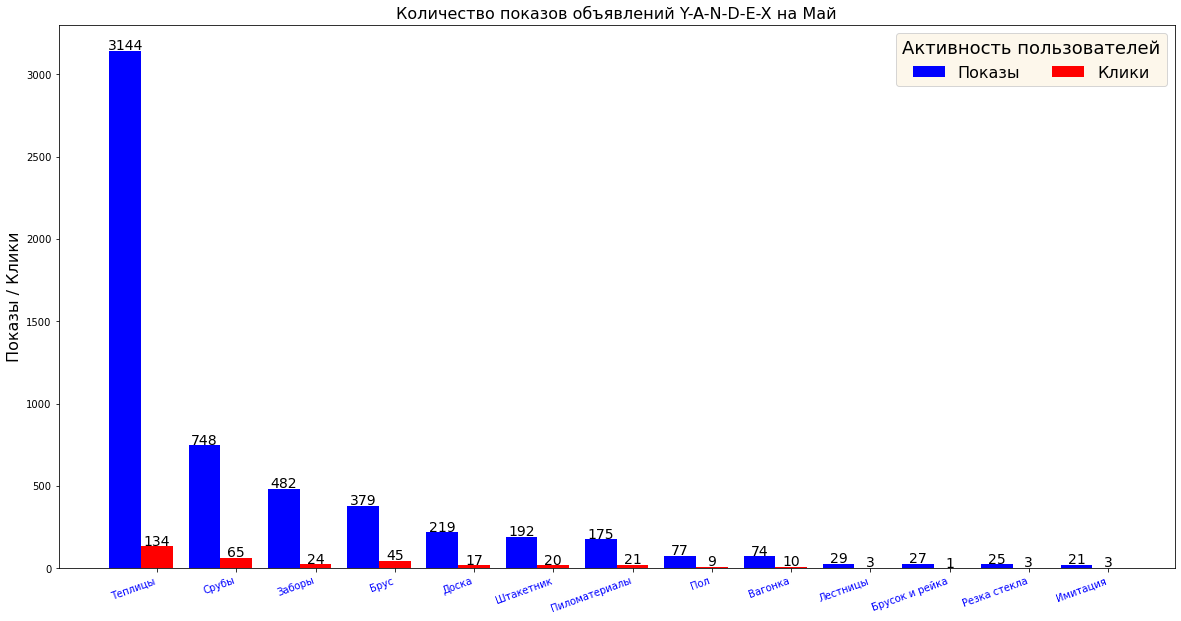

In [18]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (1-Январь)
popular_query = search_report_month(search, 5).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики на ' + title + '.png')

<ipython-input-23-86b35cb64220>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


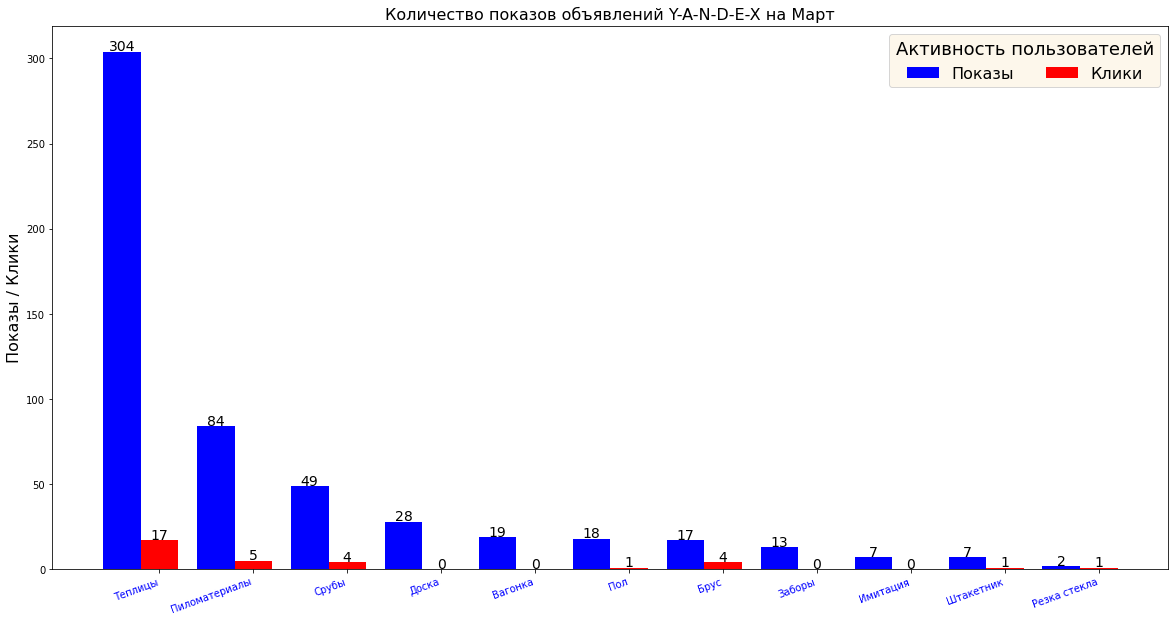

In [23]:
# Гистограмма 'Количество показов и кликов объявлений' за выбранный месяц (2-Февраль)
popular_query = search_report_month(search, 3).sort_values('sum_shows', ascending=False)
title = popular_query['month'][0]

fig = plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений Y-A-N-D-E-X на ' + title, fontsize=16)
width = 0.2
x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query.sum_shows.to_list()
click = popular_query.sum_click.to_list()

ax = plt.subplot(111)
shows = ax.bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax.bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax.set_ylabel('Показы / Клики', fontsize=16)
ax.set_xticks(x+width)

ax.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax.legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка
         
def autolabel(rects):
    for p in rects.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики yandex на ' + title + '.png')

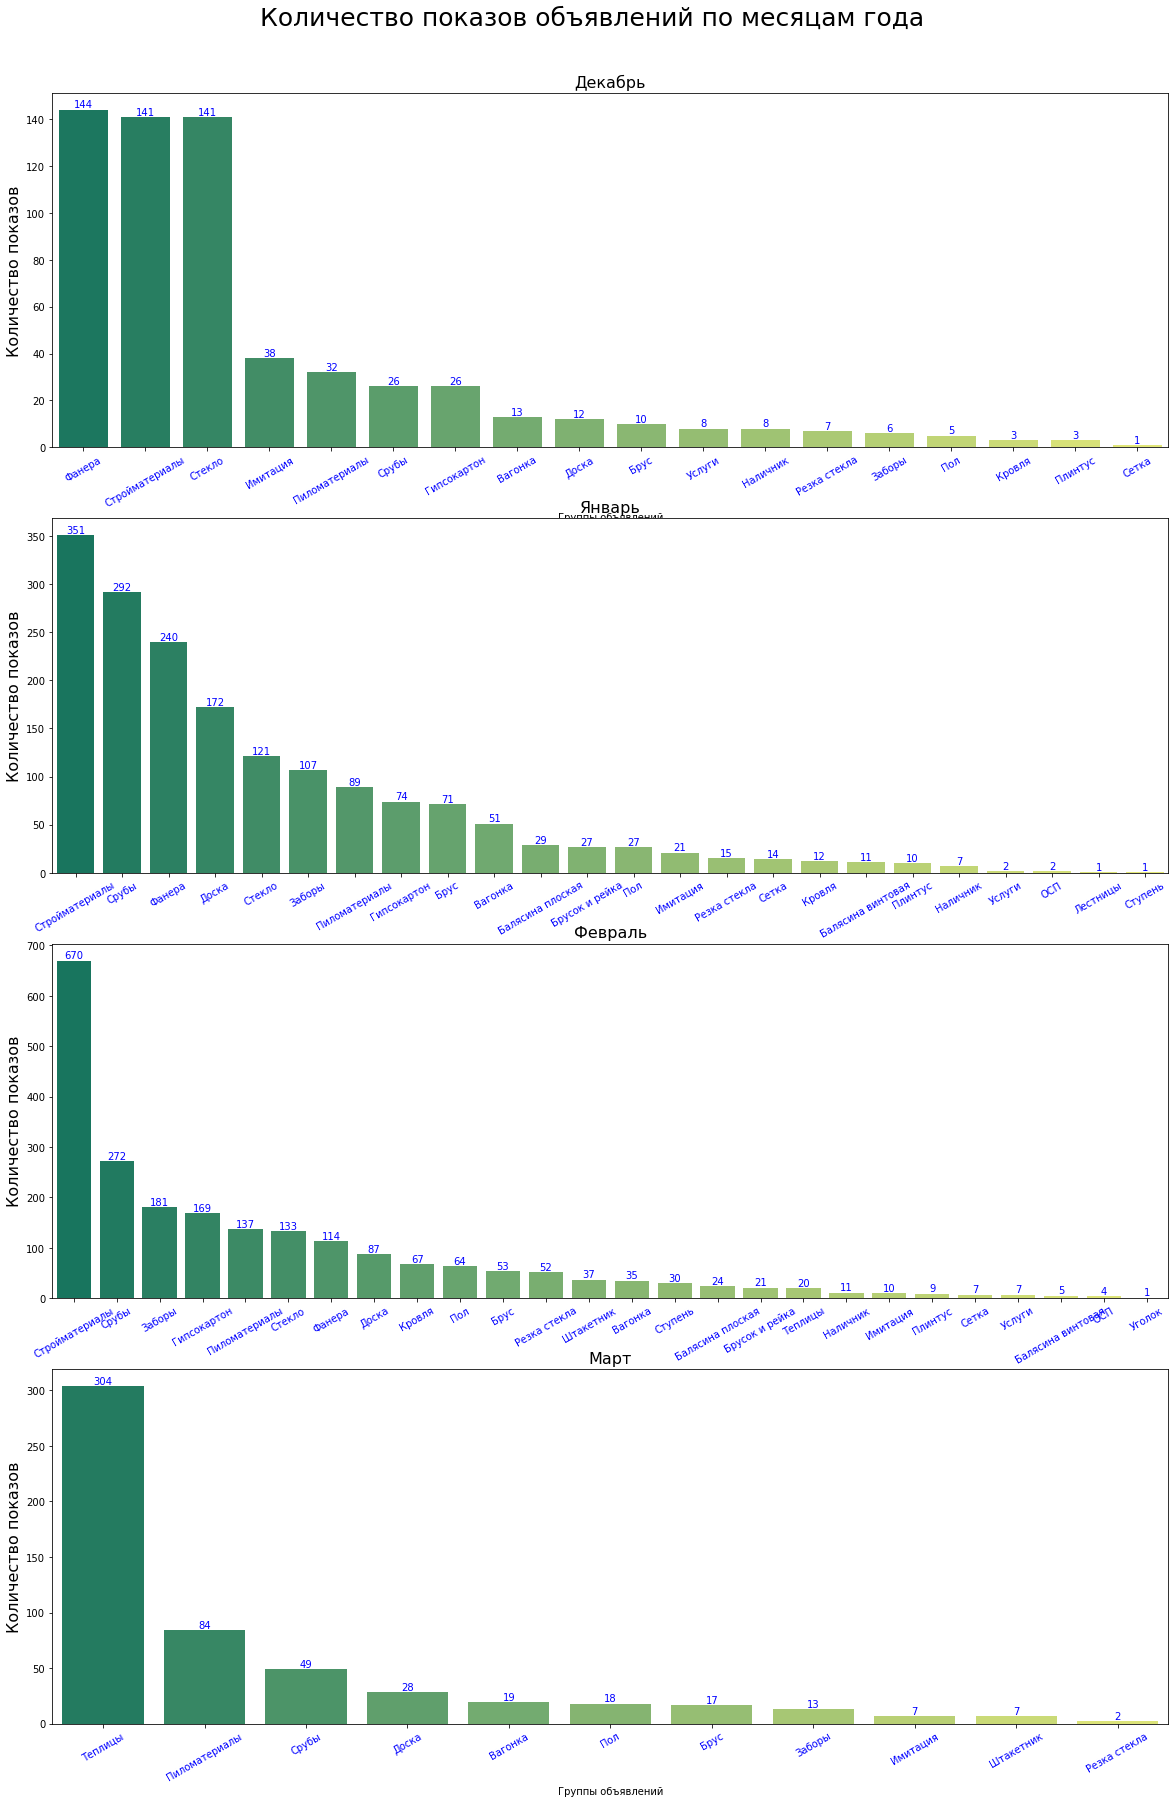

In [25]:
# Гистограмма 'Количество показов объявлений' за декабрь - март
m = {0 : 12, 1 : 1, 2 : 2, 3 :3}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    ax[i].set_title(title, fontsize=16)
    sns.barplot(x='group', 
                y='sum_shows', 
                data=popular_query,
                palette='summer',
                ax=ax[i])
    ax[i].set_xlabel('Группы объявлений', fontsize=10)
    ax[i].set_ylabel('Количество показов', fontsize=16)
    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 30,    #  Поворот текста
                       verticalalignment =  'top')    #  Вертикальное выравнивание
    # annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                       textcoords='offset points')
    fig.set_figheight(30)
    fig.set_figwidth(20)

plt.show()

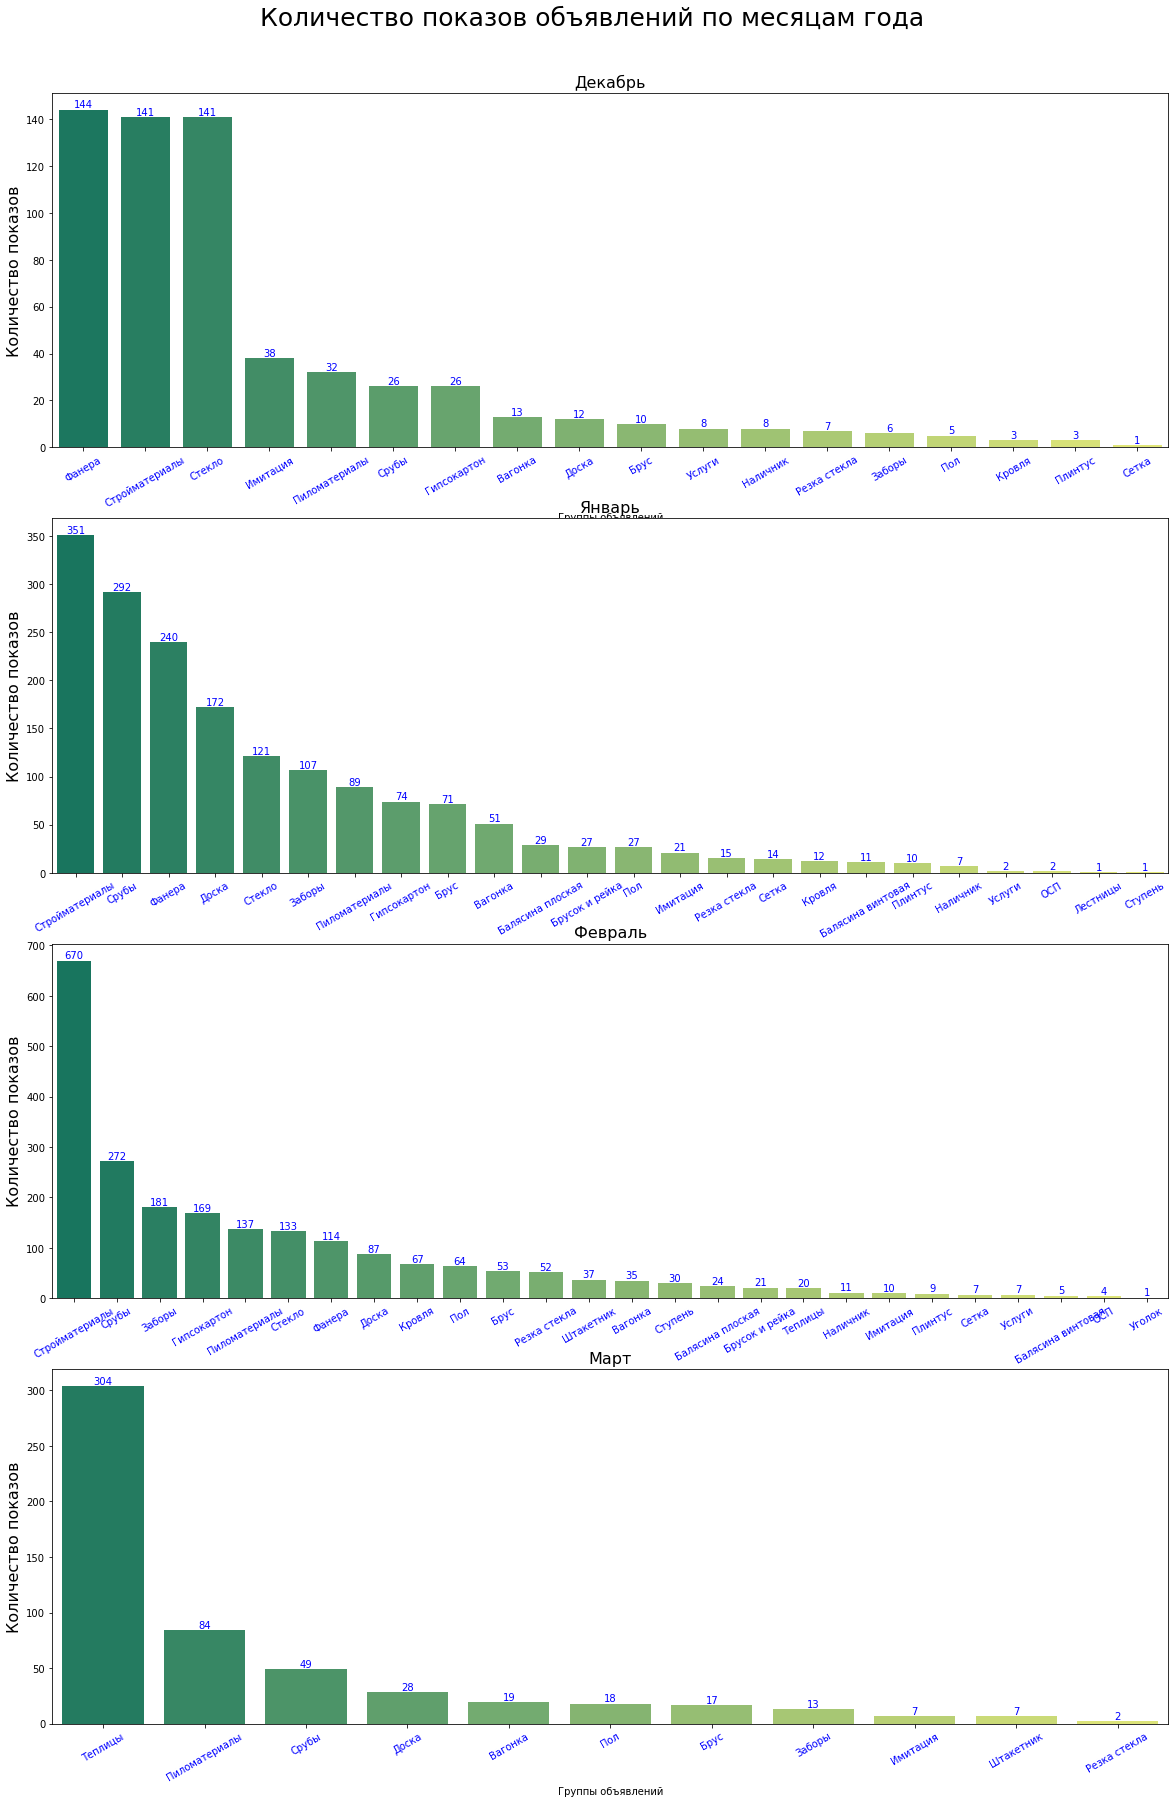

In [27]:
# Гистограмма 'Количество показов объявлений' за декабрь - март
m = {0 : 12, 1 : 1, 2 : 2, 3 : 3}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    ax[i].set_title(title, fontsize=16)
    sns.barplot(x='group', 
                y='sum_shows', 
                data=popular_query,
                palette='summer',
                ax=ax[i])
    ax[i].set_xlabel('Группы объявлений', fontsize=10)
    ax[i].set_ylabel('Количество показов', fontsize=16)
    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 30,    #  Поворот текста
                       verticalalignment =  'top')    #  Вертикальное выравнивание
    # annotation here
    for p in ax[i].patches:
        ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                       textcoords='offset points')
    fig.set_figheight(30)
    fig.set_figwidth(20)

plt.show()

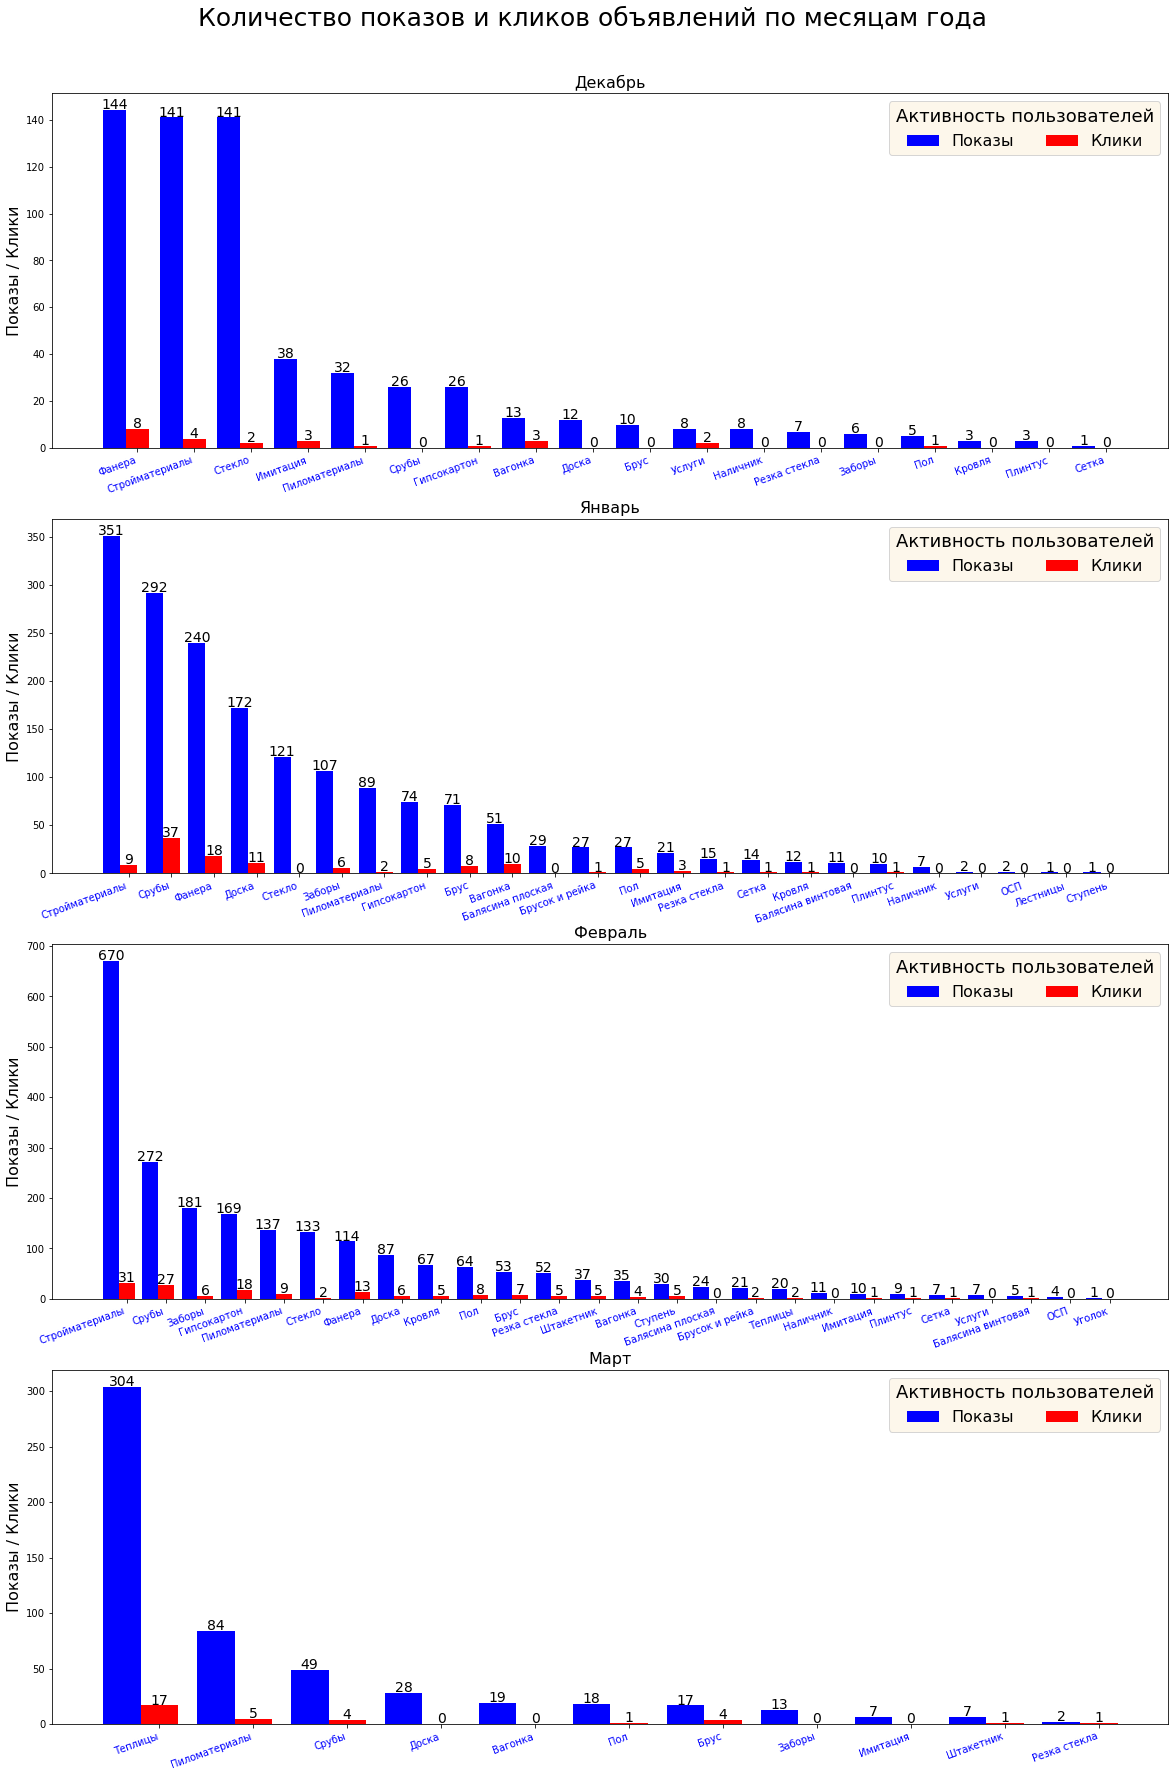

In [28]:
# Гистограмма 'Количество показов и кликов объявлений' за декабрь - март
m = {0 : 12, 1 : 1, 2 : 2, 3 : 3}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
    fig.set_figheight(30)
    fig.set_figwidth(20)

plt.show()

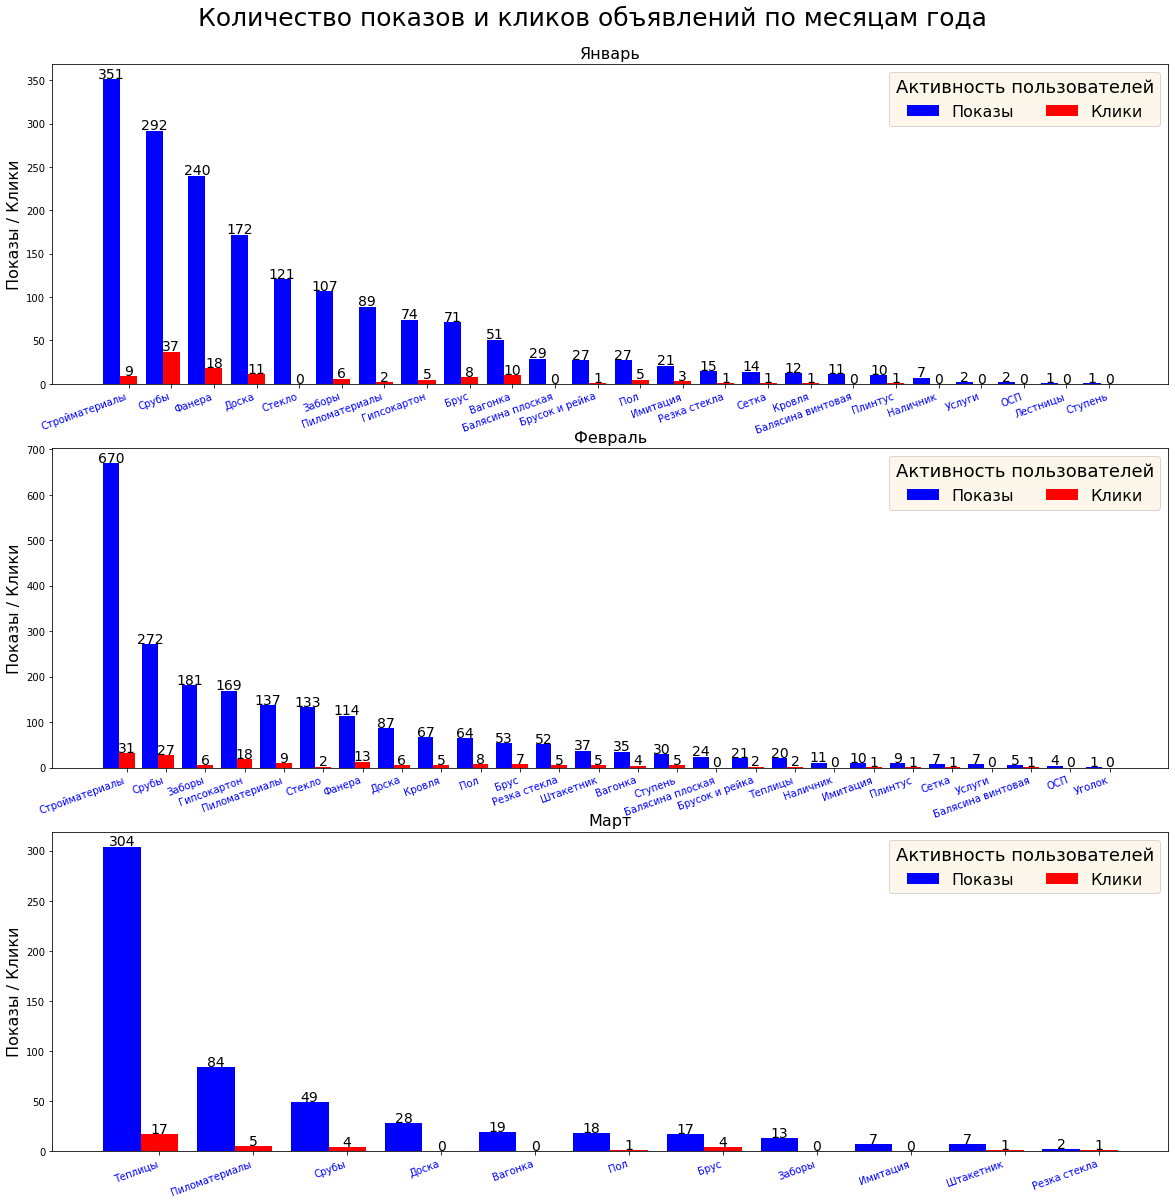

In [29]:
# Гистограмма 'Количество показов и кликов объявлений' за январь - март
m = {0 : 1, 1 : 2, 2 : 3}
fig, ax = plt.subplots(3, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(3):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
    fig.set_figheight(20)
    fig.set_figwidth(20)

plt.show()

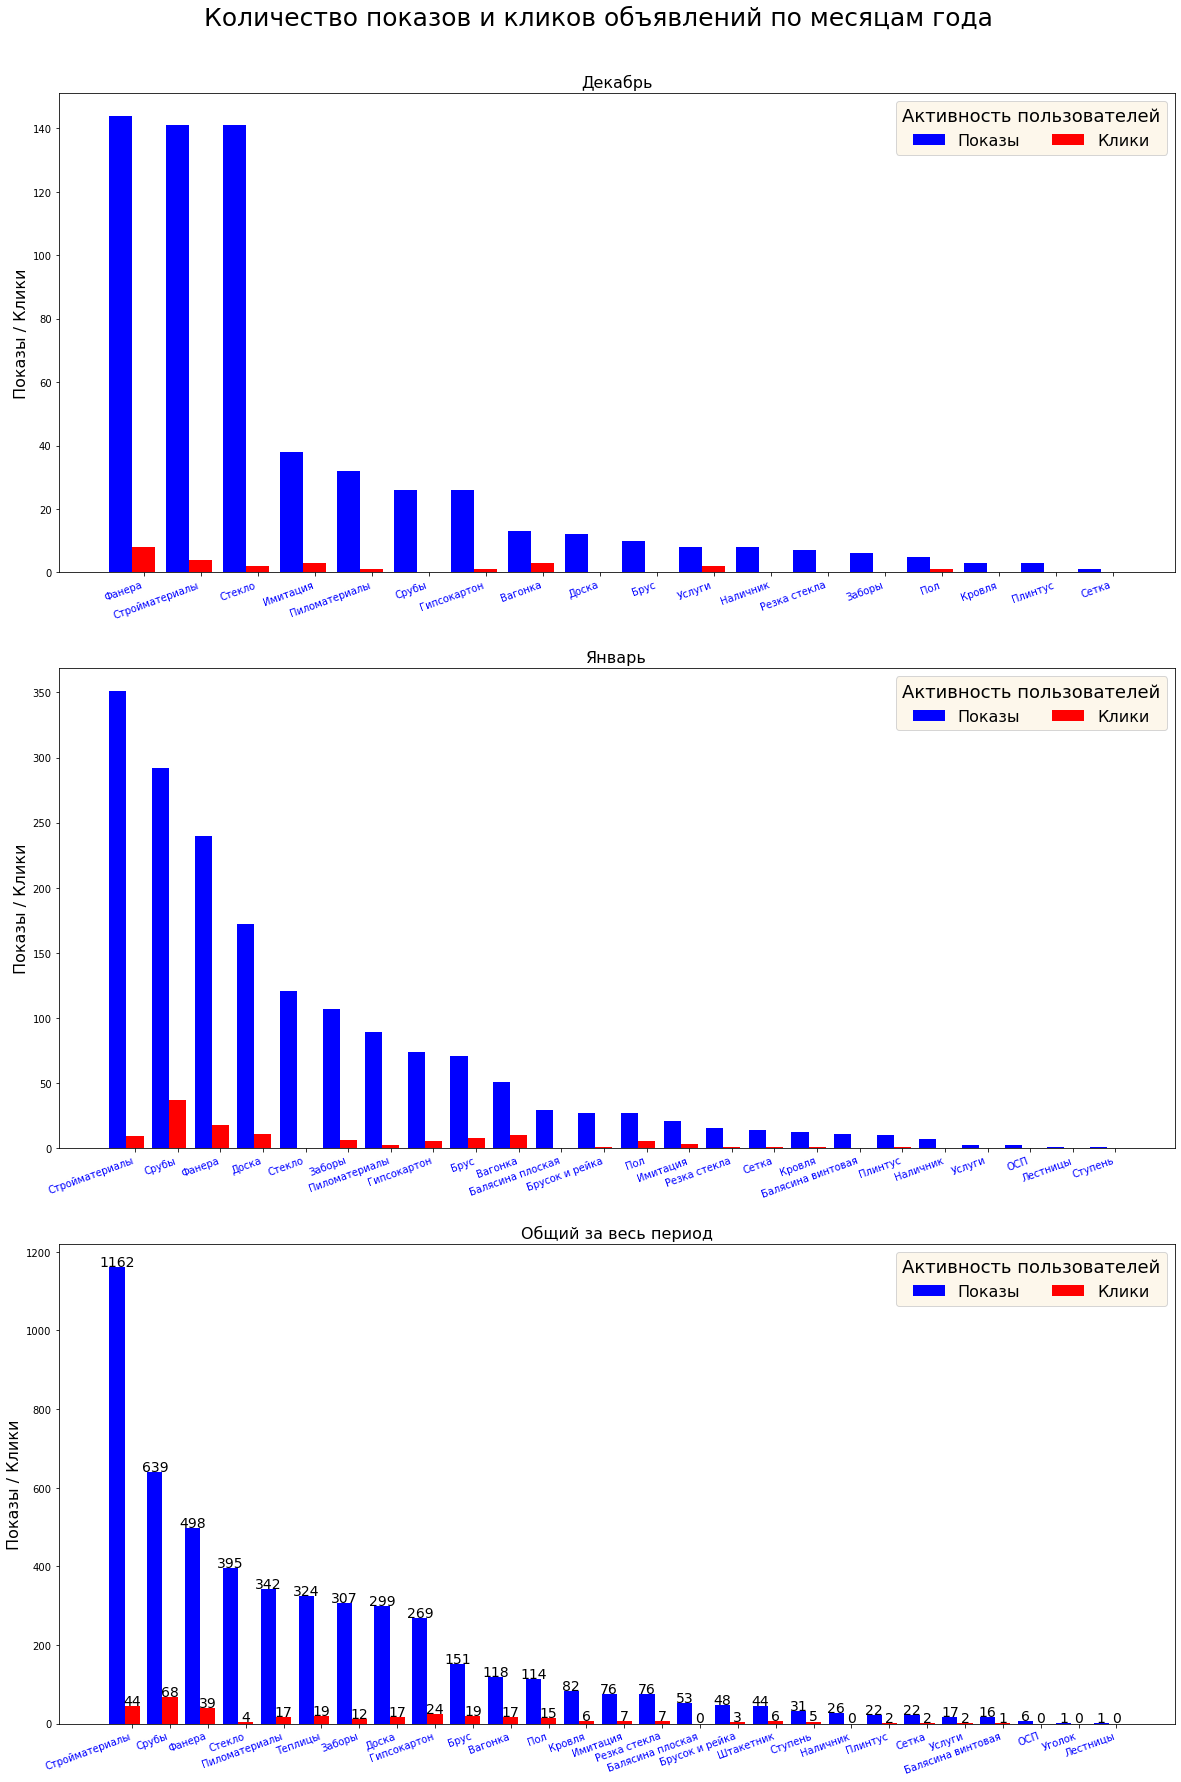

In [64]:
# Гистограмма 'Количество показов и кликов объявлений' за декабрь - январь + ОБЩИЙ
m = {0 : 12, 1 : 1}
fig, ax = plt.subplots(3, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(2):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

#    autolabel(shows)
#    autolabel(click)
#    fig.set_figheight(30)
#    fig.set_figwidth(20)

popular_query_all = search_report(search).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows = popular_query_all.sum_shows.to_list()
click = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий за весь период', fontsize=16)

shows = ax[i+1].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
click = ax[i+1].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows)
autolabel(click)
fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала кампании.png')

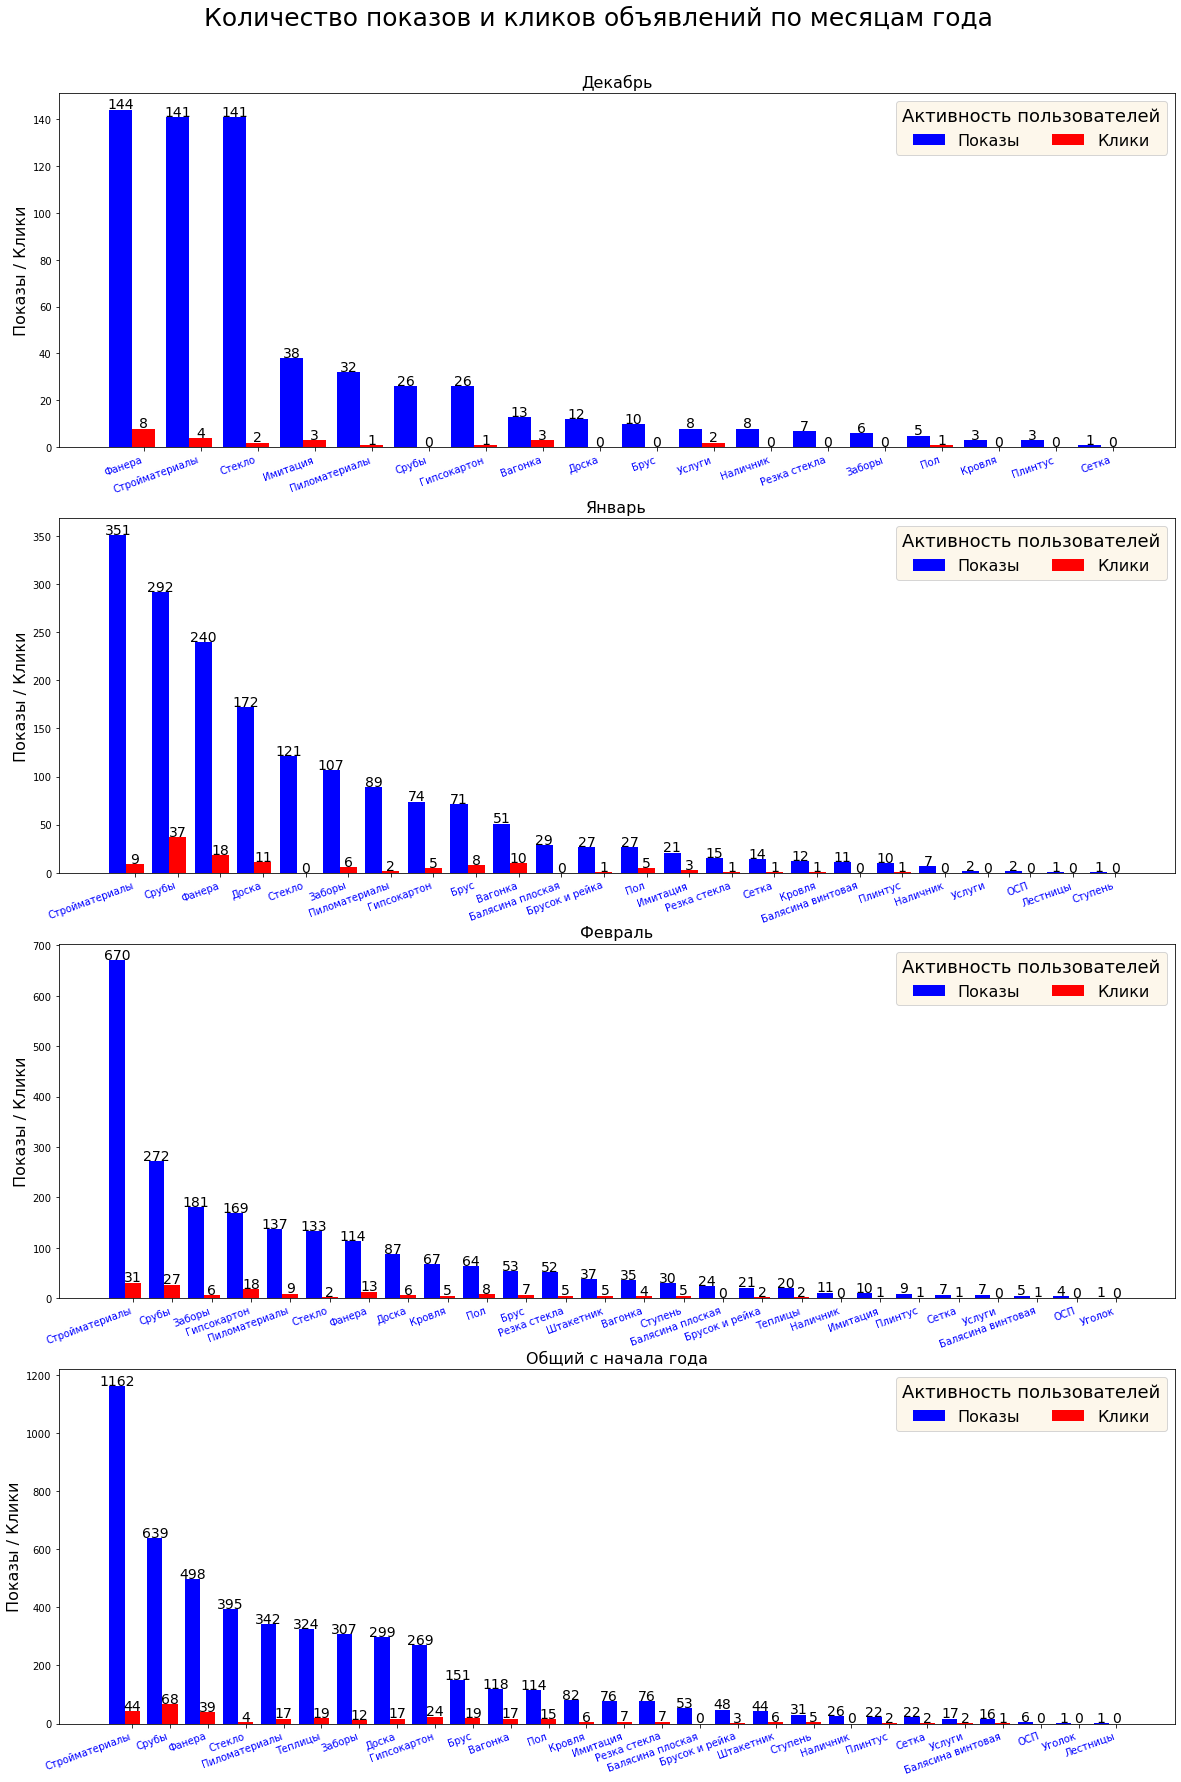

In [68]:
# Гистограмма 'Количество показов и кликов объявлений' за декабрь - февраль + ОБЩИЙ
m = {0 : 12, 1 : 1, 2 : 2}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(3):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = search_report(search).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала кампании.png')

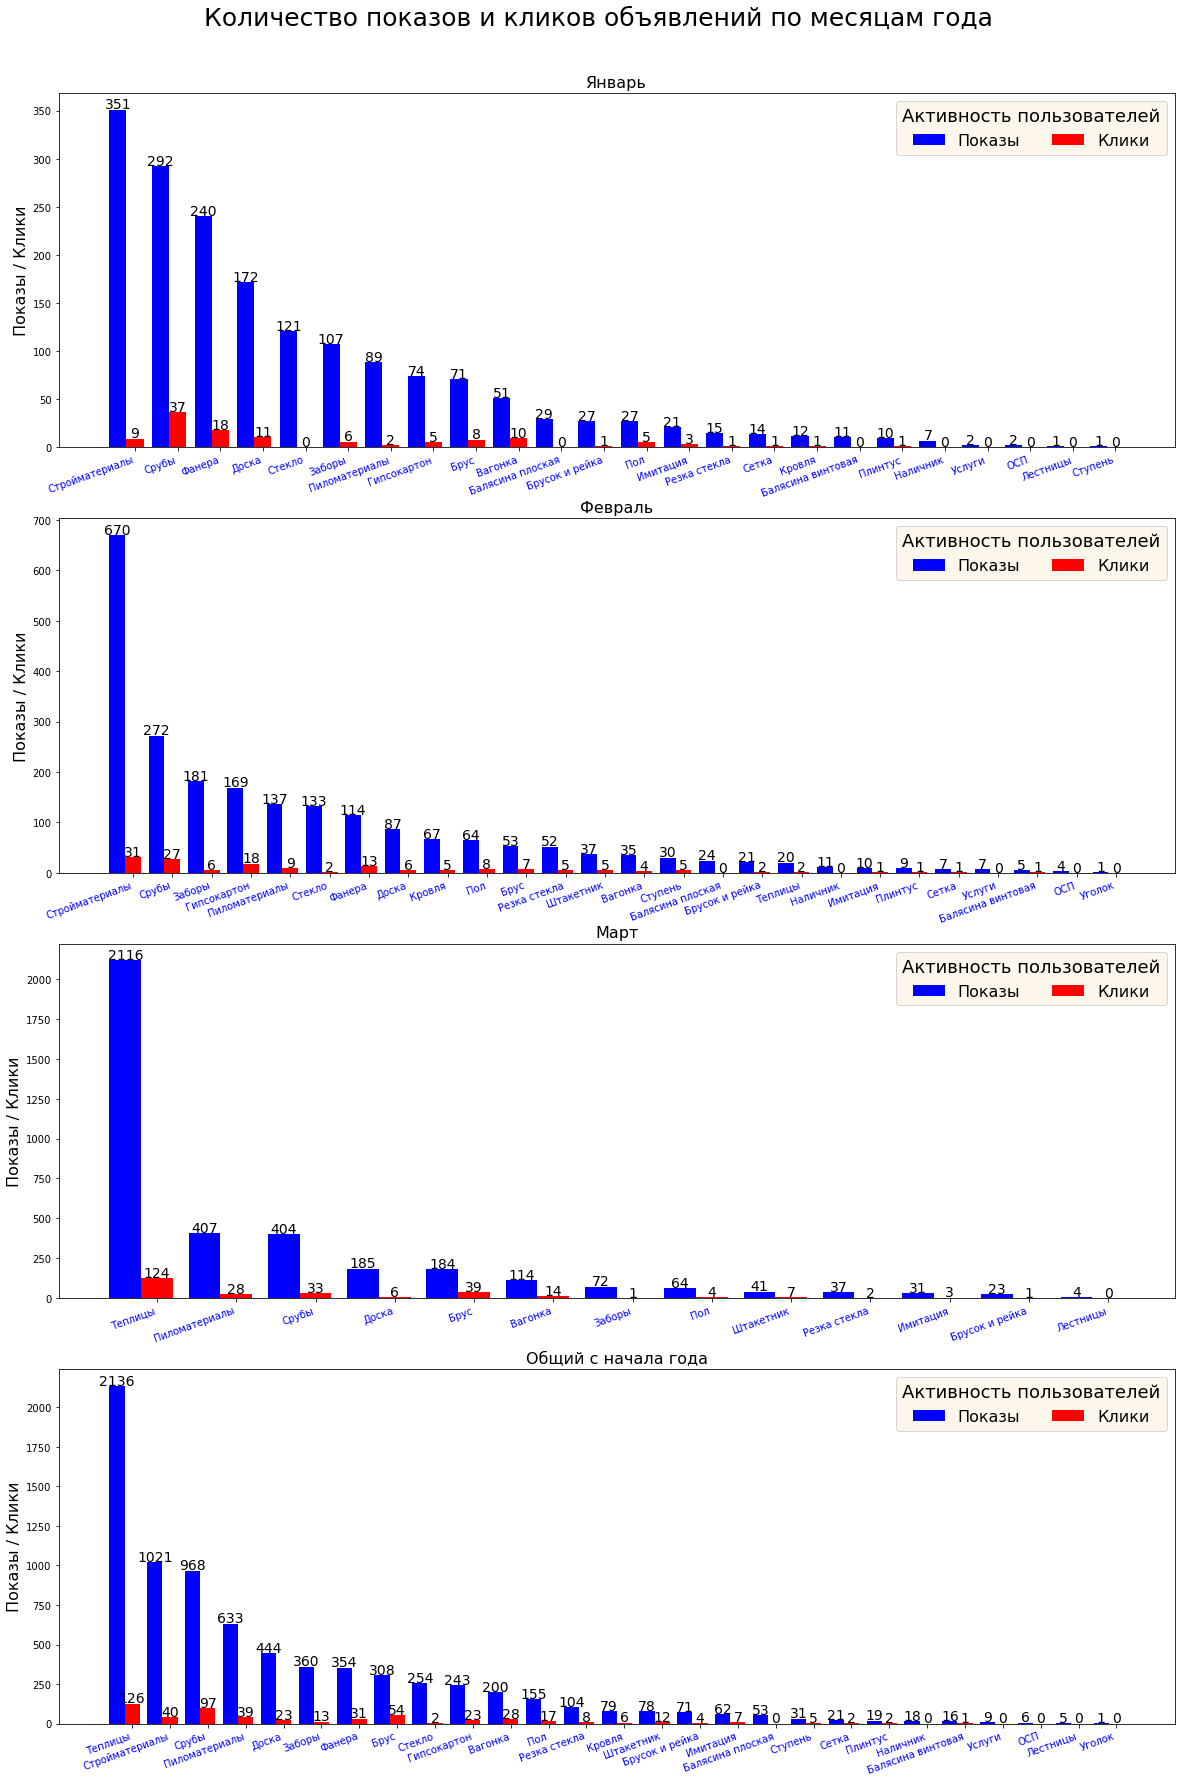

In [81]:
# Гистограмма 'Количество показов и кликов объявлений' за январь - март + ОБЩИЙ
m = {0 : 1, 1 : 2, 2 : 3}
fig, ax = plt.subplots(4, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(3):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = search_report(search).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()
# fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')

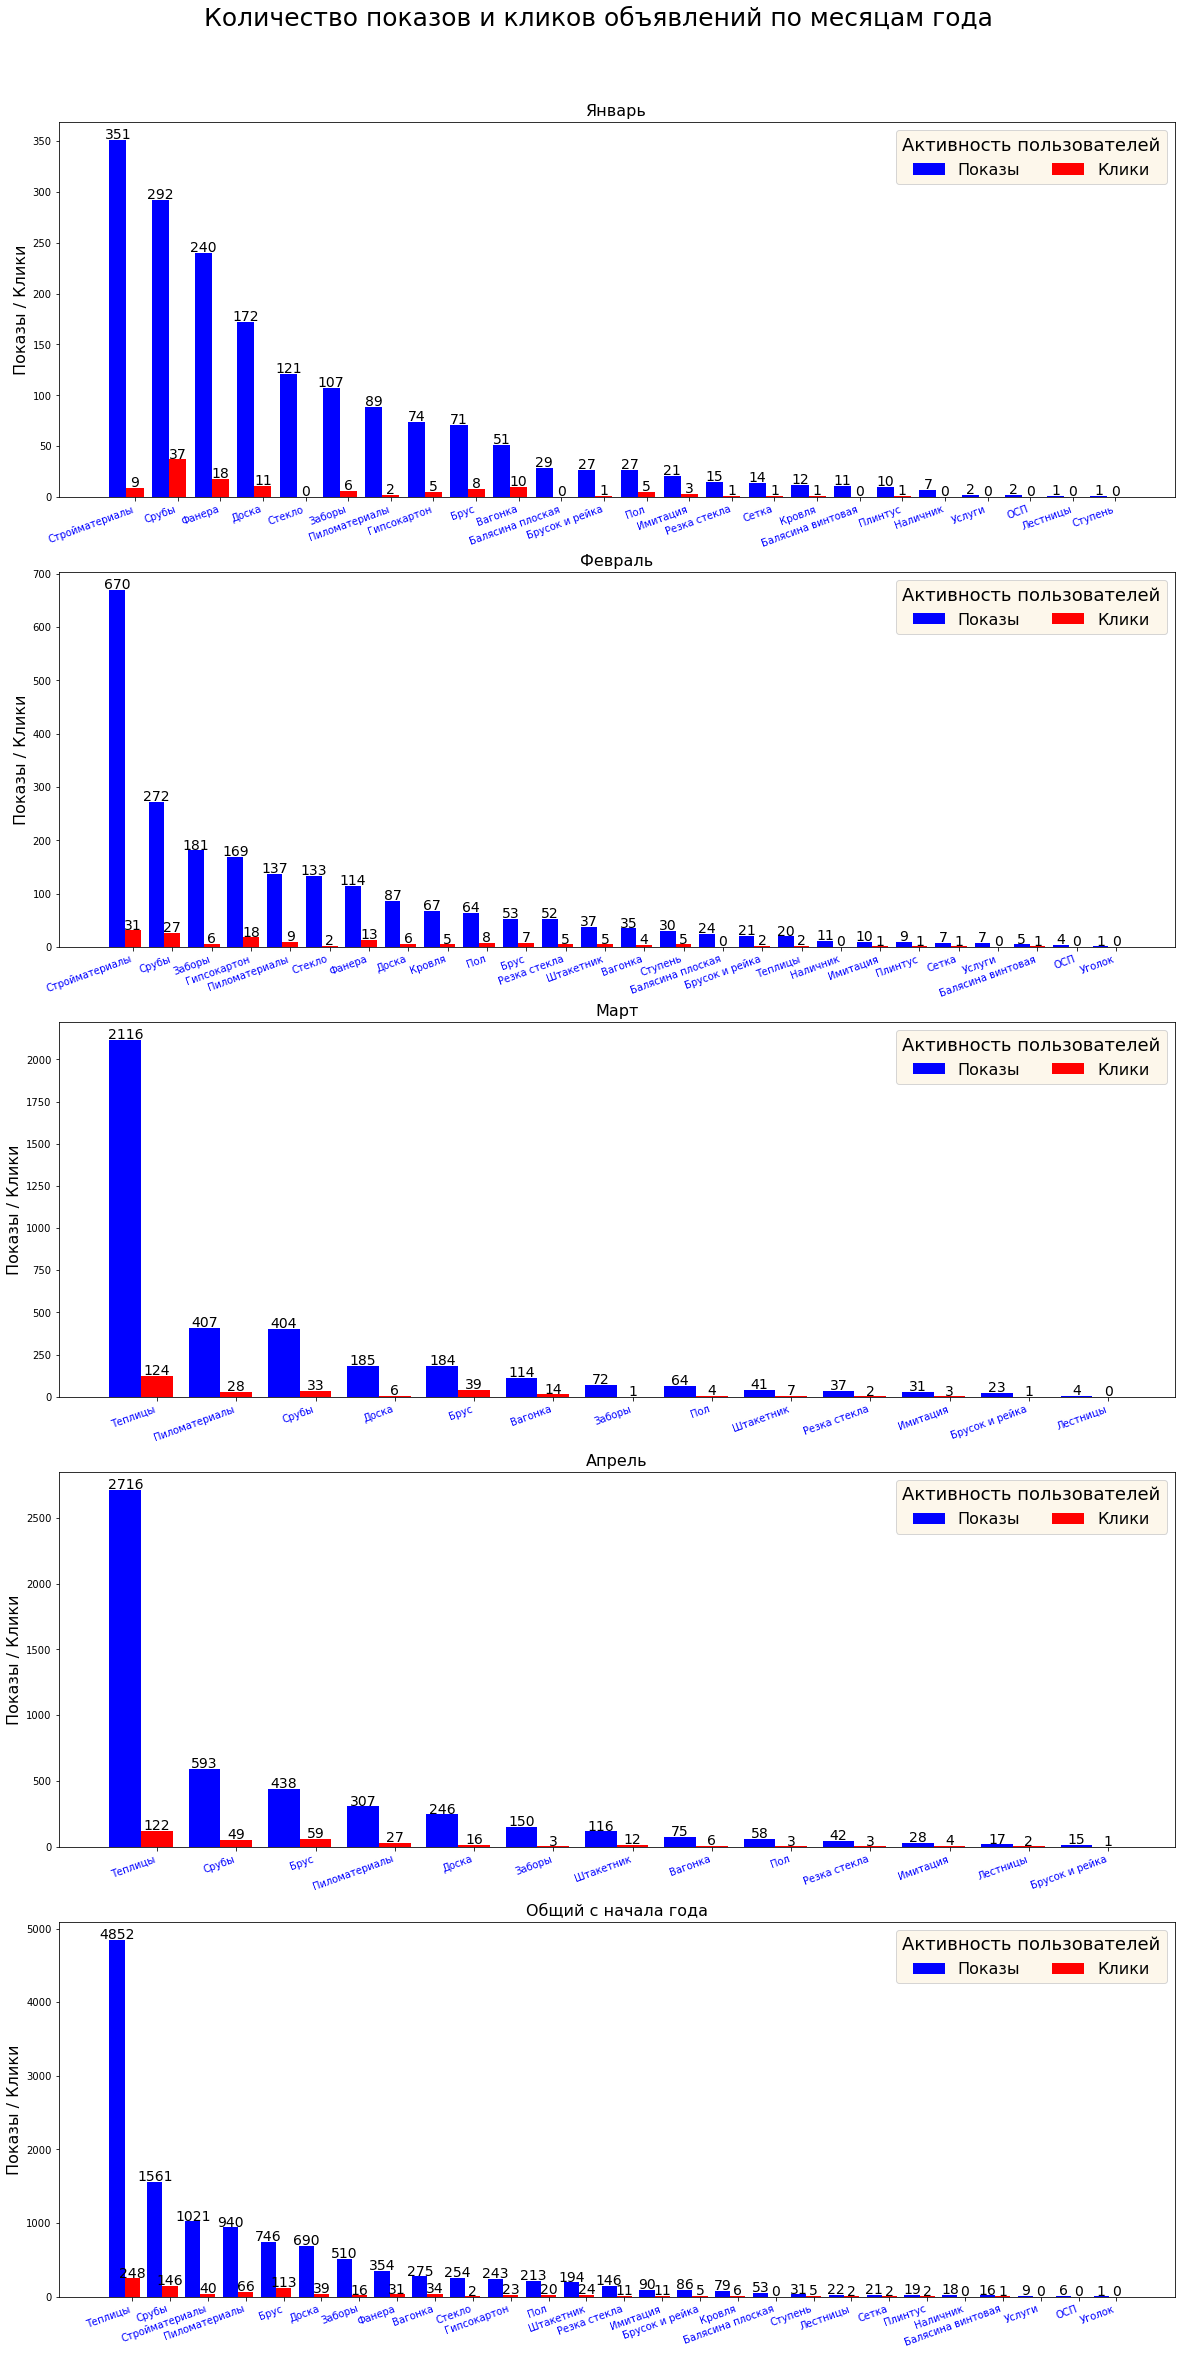

In [18]:
# Гистограмма 'Количество показов и кликов объявлений' за январь - апрель + ОБЩИЙ
m = {0:1, 1:2, 2:3, 3:4}
fig, ax = plt.subplots(5, 1)
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(4):
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = search_report(search).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(40)
fig.set_figwidth(20)

plt.show()
#fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')

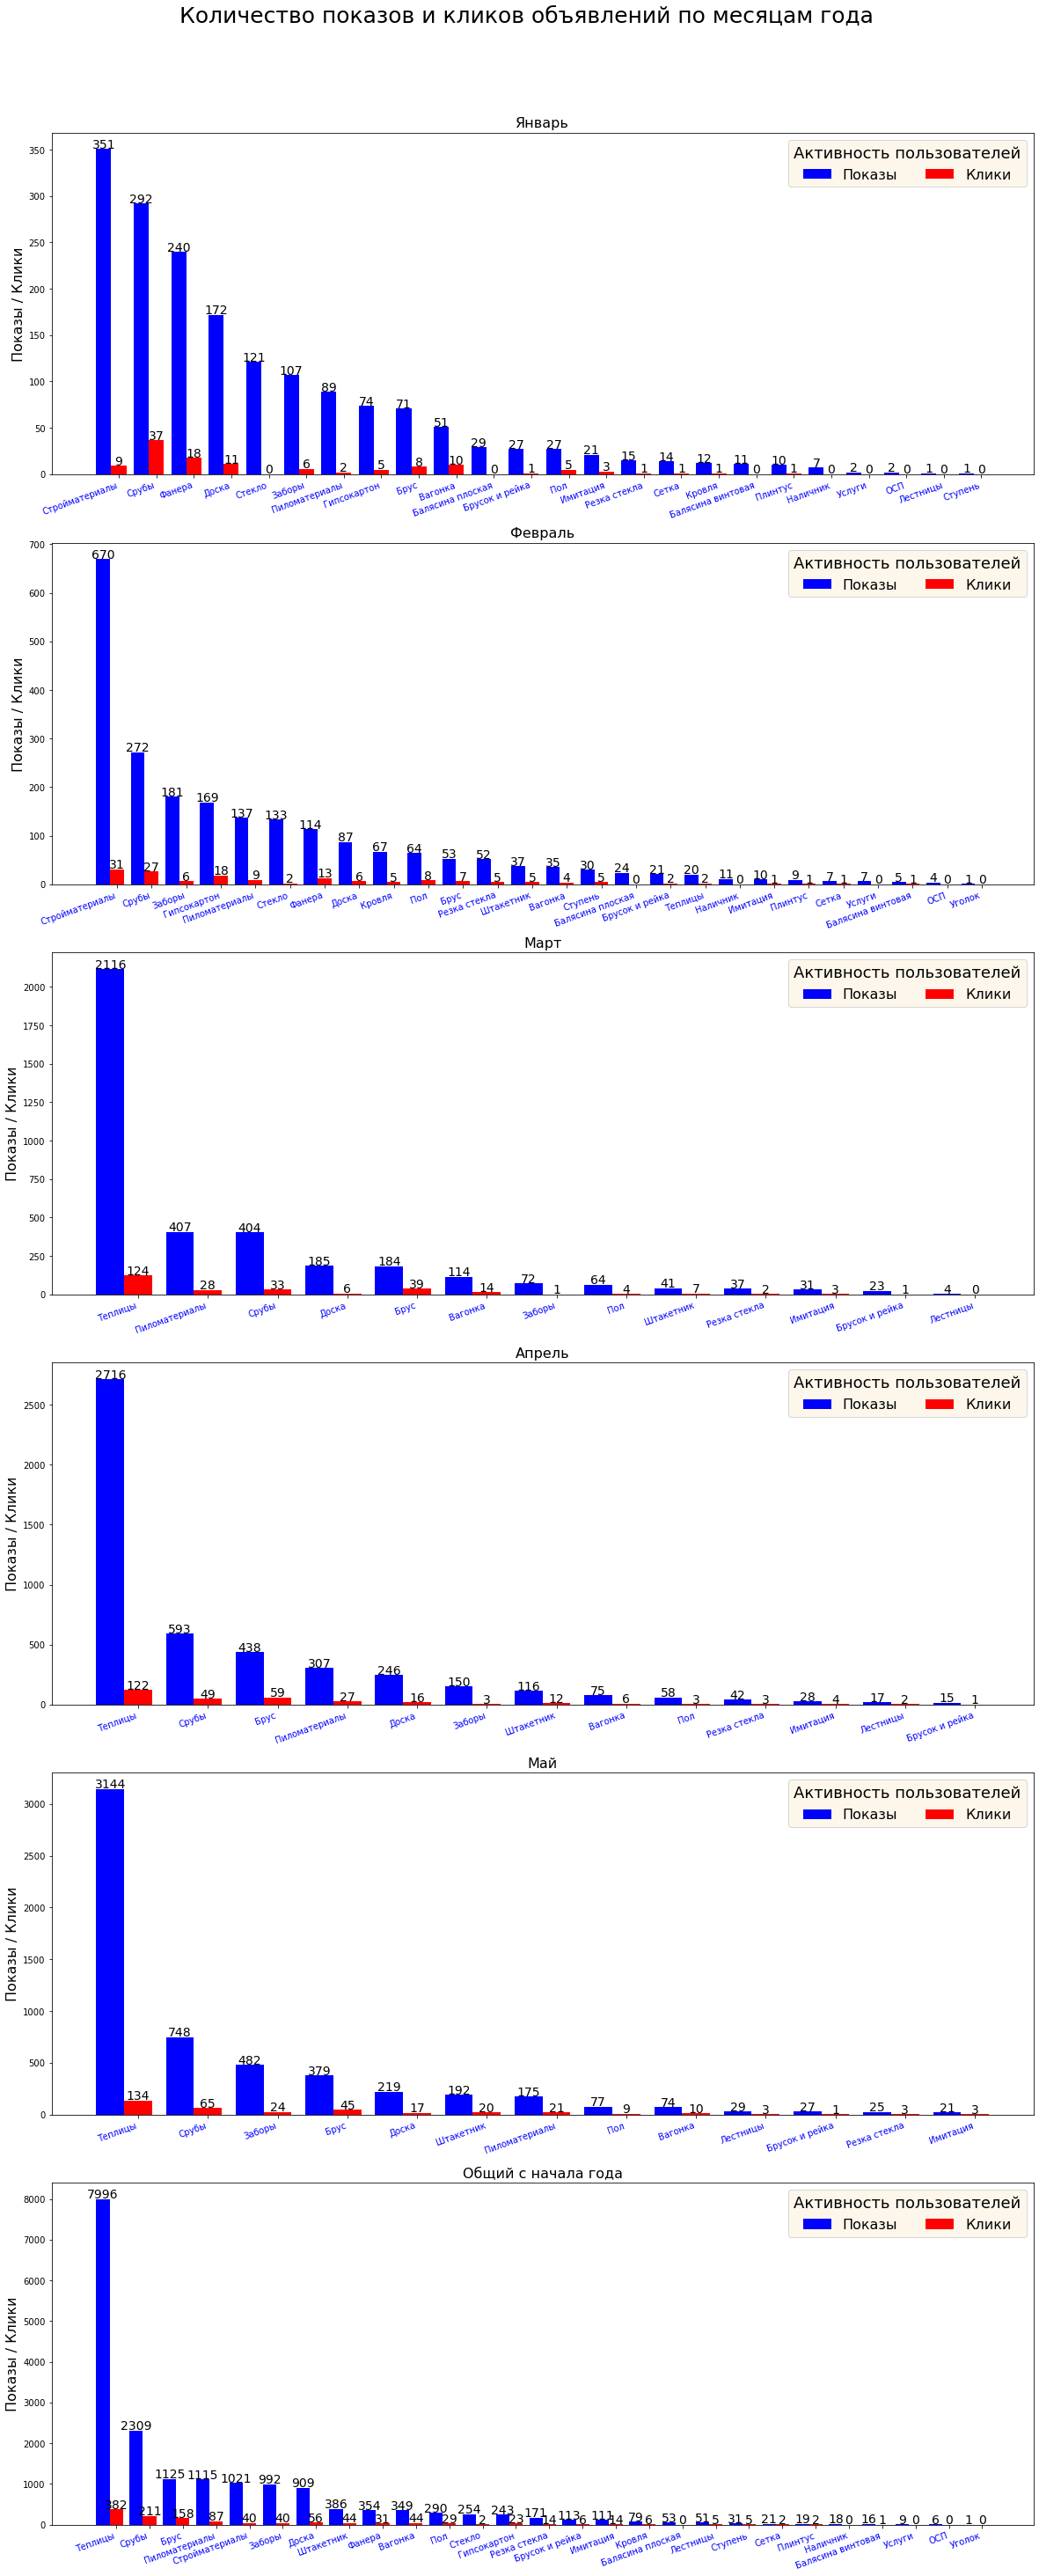

In [22]:
# Гистограмма 'Количество показов и кликов объявлений' за январь - май + ОБЩИЙ
m = {0:1, 1:2, 2:3, 3:4, 4:5} # !!! Добавляем номер очередного месяца
fig, ax = plt.subplots(6, 1) # !!! Увеличиваем количество блоков из расчета кол-во месяцев + общий
#  Заголовок области Figure:
fig.suptitle('Количество показов и кликов объявлений по месяцам года',
             y = 0.92,
             fontsize = 25)

for i in range(5): # !!! Количество циклов = количество месяцев
    popular_query = search_report_month(search, m[i]).sort_values('sum_shows', ascending=False)
    title = popular_query['month'][0]
    width = 0.2
    x = np.arange(1, popular_query.shape[0]+1)
# x = np.arange(1, 19)

    shows = popular_query.sum_shows.to_list()
    click = popular_query.sum_click.to_list()
    
    ax[i].set_title(title, fontsize=16)

    shows = ax[i].bar(x-width, shows, width = 0.4, color='b', align='center', label = 'Показы')
    click = ax[i].bar(x+width, click, width = 0.4, color='r', align='center', label = 'Клики')

    ax[i].set_ylabel('Показы / Клики', fontsize=16)
    ax[i].set_xticks(x+width)

    ax[i].set_xticklabels(popular_query.group,
                      fontsize = 10, # horizontal
                       color = 'b',    #  Цвет текста
                       rotation = 20,    #  Поворот текста
                       ha='right')    #  Вертикальное выравнивание
    ax[i].legend(fontsize = 16,
              ncol = 2,    #  количество столбцов
              facecolor = 'oldlace',    #  цвет области
              title = 'Активность пользователей',    #  заголовок
              title_fontsize = '18')    #  размер шрифта заголовка

    def autolabel(rects):
        for p in rects.patches:
            ax[i].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

    autolabel(shows)
    autolabel(click)
#    fig.set_figheight(20)
#    fig.set_figwidth(20)

popular_query_all = search_report(search).sort_values('sum_shows', ascending=False)
width = 0.2
x = np.arange(1, popular_query_all.shape[0]+1)
# x = np.arange(1, 19)

shows1 = popular_query_all.sum_shows.to_list()
click1 = popular_query_all.sum_click.to_list()

ax[i+1].set_title('Общий с начала года', fontsize=16)

shows1 = ax[i+1].bar(x-width, shows1, width = 0.4, color='b', align='center', label = 'Показы')
click1 = ax[i+1].bar(x+width, click1, width = 0.4, color='r', align='center', label = 'Клики')

ax[i+1].set_ylabel('Показы / Клики', fontsize=16)
ax[i+1].set_xticks(x+width)

ax[i+1].set_xticklabels(popular_query_all.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 20,    #  Поворот текста
                   ha='right')    #  Вертикальное выравнивание
ax[i+1].legend(fontsize = 16,
          ncol = 2,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          title = 'Активность пользователей',    #  заголовок
          title_fontsize = '18')    #  размер шрифта заголовка

def autolabel(rects):
    for p in rects.patches:
        ax[i+1].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

autolabel(shows1)
autolabel(click1)
fig.set_figheight(50) # !!! Увеличиваем общую высоту поля для графиков: высота = количество месяцев * 10
fig.set_figwidth(20)

plt.show()
fig.savefig('C:/Users/Андрей/Downloads/Показы и клики с начала года.png')